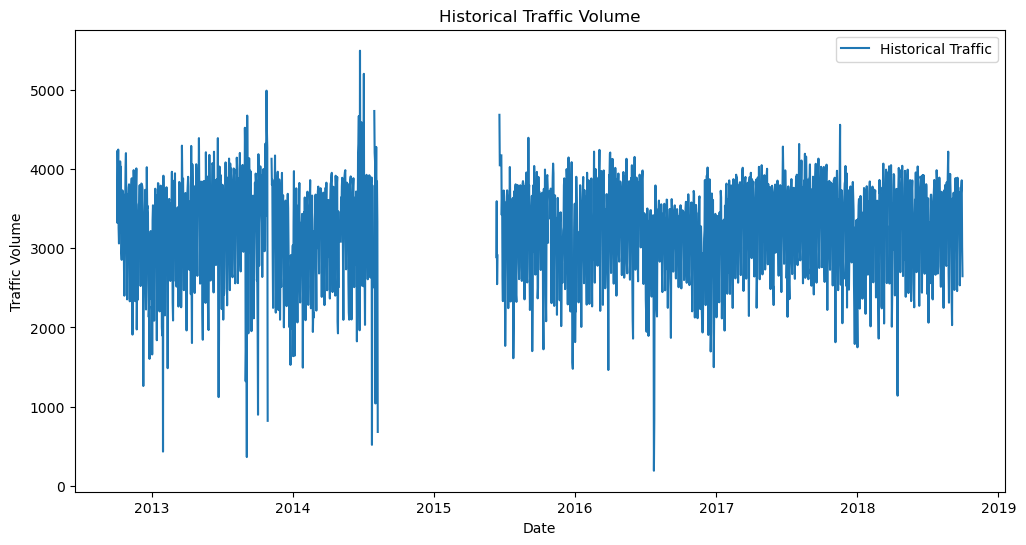

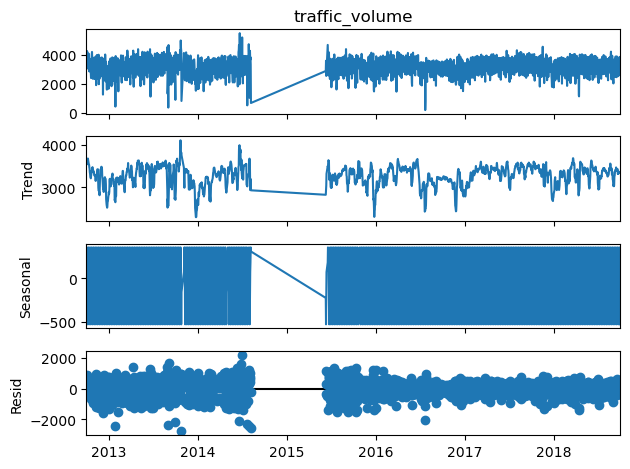

C:\Users\Flash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Flash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Flash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Flash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

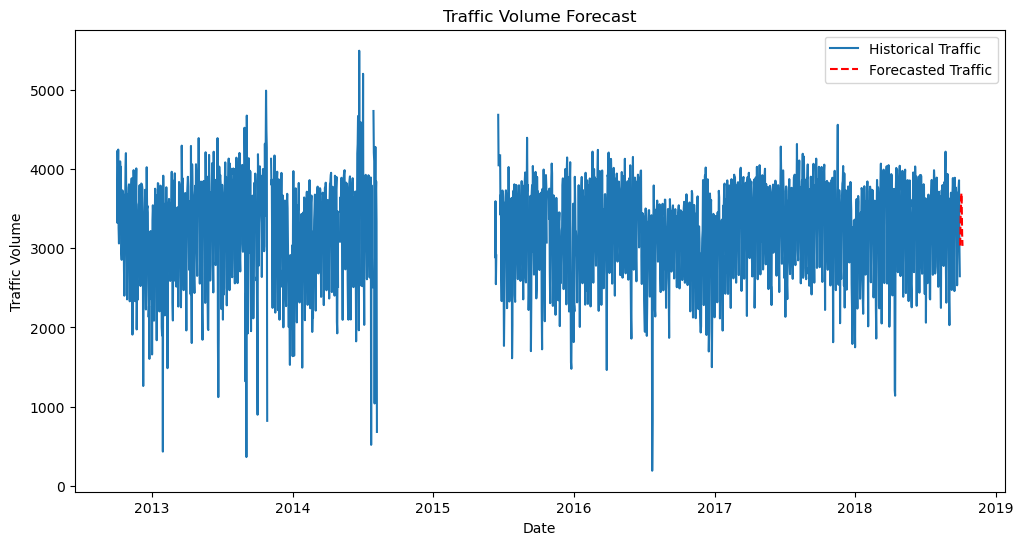

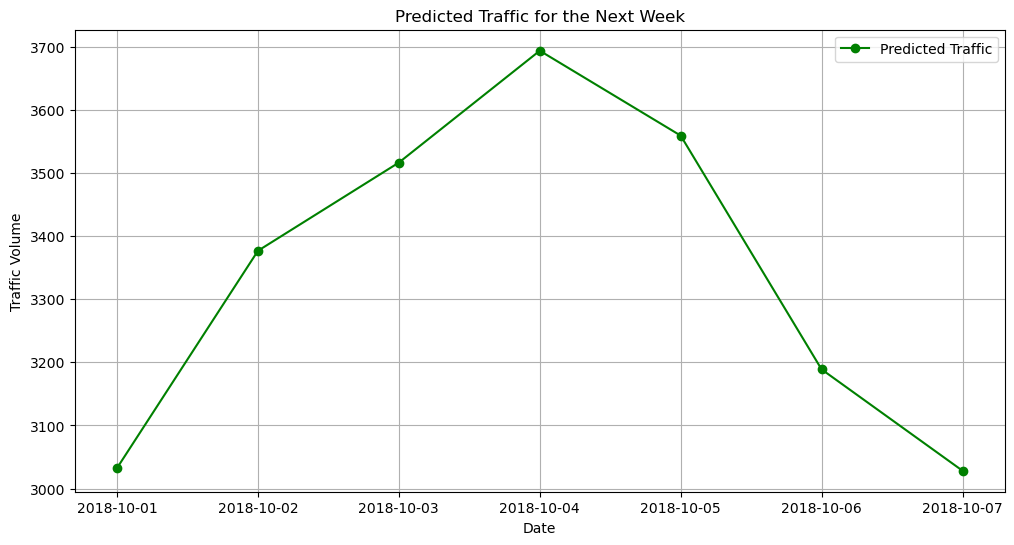

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# File path for the dataset
file_path = "Desktop/big data visualization/dataset/cleaned_transformed_dataset3.csv"

# Load data into a Pandas DataFrame
data_cleaned_pd = pd.read_csv(file_path)

# Convert 'date_time' column to datetime
data_cleaned_pd['date_time'] = pd.to_datetime(data_cleaned_pd['date_time'])

# Set 'date_time' as the index
data_cleaned_pd.set_index('date_time', inplace=True)

# Resample data to daily average traffic volume
daily_traffic = data_cleaned_pd['traffic_volume'].resample('D').mean()

# Ensure the time series has a defined frequency
daily_traffic = daily_traffic.asfreq('D')

# Plot historical traffic volume
plt.figure(figsize=(12, 6))
plt.plot(daily_traffic, label='Historical Traffic')
plt.title('Historical Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Decompose the time series to analyze trends and seasonality
decomposition = seasonal_decompose(daily_traffic.dropna(), model='additive', period=7)  # Weekly seasonality
decomposition.plot()
plt.show()

# Fit an ARIMA model for forecasting
model = ARIMA(daily_traffic.dropna(), order=(5, 1, 1))  # Adjust order as needed
arima_model = model.fit()

# Forecast traffic for the next 7 days
forecast = arima_model.forecast(steps=7)
forecast_dates = pd.date_range(start=daily_traffic.index[-1] + pd.Timedelta(days=1), periods=7)

# Create a DataFrame for visualization
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Traffic': forecast.values})
forecast_df.set_index('Date', inplace=True)

# Plot the forecasted traffic with historical data
plt.figure(figsize=(12, 6))
plt.plot(daily_traffic, label='Historical Traffic')
plt.plot(forecast_df, label='Forecasted Traffic', linestyle='--', color='red')
plt.title('Traffic Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Plot the forecasted week traffic separately
plt.figure(figsize=(12, 6))
plt.plot(forecast_df, marker='o', linestyle='-', color='green', label='Predicted Traffic')
plt.title('Predicted Traffic for the Next Week')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid()
plt.show()
